In [1]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image_dataset_from_directory
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

In [2]:
class_names = ['Mondriaan','Picasso','Rembrandt','Rubens', 'VanGogh']
train_dataset = image_dataset_from_directory("/content/drive/MyDrive/deeplearning/deeplearning-schilderijen_Kenneth-Vandenbroucke/schilderijen/selected_images/train",
                                             image_size=(500,500),
                                             labels = 'inferred',
                                             batch_size = 32,
                                             class_names= class_names,
                                             label_mode = 'categorical')
validation_dataset = image_dataset_from_directory("/content/drive/MyDrive/deeplearning/deeplearning-schilderijen_Kenneth-Vandenbroucke/schilderijen/selected_images/val",
                                                  image_size=(500,500),
                                                  labels = 'inferred',
                                                  batch_size = 32,
                                                  class_names = class_names,
                                                  label_mode = 'categorical')
test_dataset = image_dataset_from_directory("/content/drive/MyDrive/deeplearning/deeplearning-schilderijen_Kenneth-Vandenbroucke/schilderijen/selected_images/test",
                                            image_size=(500,500),
                                            labels = 'inferred',
                                            class_names = class_names,
                                            batch_size = 32,
                                            label_mode = 'categorical')

Found 1140 files belonging to 5 classes.
Found 380 files belonging to 5 classes.
Found 380 files belonging to 5 classes.


In [ ]:
conv_base = keras.applications.VGG16(
 weights="imagenet",
 include_top=False)
conv_base.trainable = False

58900480/58889256 [==============================] - 0s 0us/step


In [5]:
data_augmentation = keras.Sequential(
 [
layers.experimental.preprocessing.RandomFlip("horizontal"),
layers.experimental.preprocessing.RandomRotation(0.1),
layers.experimental.preprocessing.RandomZoom(0.2),
 ]
)
inputs = keras.Input(shape=(500, 500, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(500)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(len(class_names), activation="softmax")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="categorical_crossentropy",
optimizer="RMSprop",
metrics=["categorical_accuracy"])

In [ ]:
callbacks = [
 keras.callbacks.ModelCheckpoint(
filepath="VGG16_5schilders.h5",
save_best_only=True,
monitor="val_loss")
]
history = model.fit(
 train_dataset,
 epochs=10,
 validation_data=validation_dataset,
 callbacks=callbacks)

Epoch 1/10
36/36 [==============================] - 287s 8s/step - loss: 374.9890 - categorical_accuracy: 0.6000 - val_loss: 158.5256 - val_categorical_accuracy: 0.7526
Epoch 2/10
36/36 [==============================] - 72s 2s/step - loss: 116.9846 - categorical_accuracy: 0.7921 - val_loss: 87.1689 - val_categorical_accuracy: 0.8316
Epoch 3/10
36/36 [==============================] - 70s 2s/step - loss: 73.7270 - categorical_accuracy: 0.8377 - val_loss: 104.1336 - val_categorical_accuracy: 0.8105
Epoch 4/10
36/36 [==============================] - 70s 2s/step - loss: 50.0157 - categorical_accuracy: 0.8868 - val_loss: 88.5089 - val_categorical_accuracy: 0.8842
Epoch 5/10
36/36 [==============================] - 70s 2s/step - loss: 63.8944 - categorical_accuracy: 0.8754 - val_loss: 125.9238 - val_categorical_accuracy: 0.8158
Epoch 6/10
36/36 [==============================] - 71s 2s/step - loss: 45.6648 - categorical_accuracy: 0.9061 - val_loss: 68.6601 - val_categorical_accuracy: 0.876

KeyboardInterrupt: ignored

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["categorical_accuracy"]
val_accuracy = history.history["val_categorical_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "r", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "r", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
test_model = keras.models.load_model(
 "VGG16_5schilders.h5")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

In [ ]:
conv_base = keras.applications.ResNet50(
 weights="imagenet",
 include_top=False)
conv_base.trainable = False

In [ ]:
inputs = keras.Input(shape=(500, 500, 3))
x = data_augmentation(inputs)
x = keras.applications.resnet.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(500)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(len(class_names), activation="softmax")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="categorical_crossentropy",
optimizer="RMSprop",
metrics=["categorical_accuracy"])

In [ ]:
callbacks = [
 keras.callbacks.ModelCheckpoint(
filepath="ResNet50_5schilders.h5",
save_best_only=True,
monitor="val_loss")
]
history = model.fit(
 train_dataset,
 epochs=10,
 validation_data=validation_dataset,
 callbacks=callbacks)

Epoch 1/10
36/36 [==============================] - 73s 2s/step - loss: 368.6291 - categorical_accuracy: 0.6140 - val_loss: 75.5121 - val_categorical_accuracy: 0.8316
Epoch 2/10
36/36 [==============================] - 70s 2s/step - loss: 119.5050 - categorical_accuracy: 0.7772 - val_loss: 115.4359 - val_categorical_accuracy: 0.8132
Epoch 3/10
36/36 [==============================] - 69s 2s/step - loss: 68.4685 - categorical_accuracy: 0.8482 - val_loss: 153.0808 - val_categorical_accuracy: 0.7921
Epoch 4/10
36/36 [==============================] - 69s 2s/step - loss: 79.0234 - categorical_accuracy: 0.8596 - val_loss: 117.7846 - val_categorical_accuracy: 0.8342
Epoch 5/10
36/36 [==============================] - 69s 2s/step - loss: 52.9161 - categorical_accuracy: 0.8930 - val_loss: 196.9013 - val_categorical_accuracy: 0.7737
Epoch 6/10
36/36 [==============================] - 69s 2s/step - loss: 42.9761 - categorical_accuracy: 0.9088 - val_loss: 80.8047 - val_categorical_accuracy: 0.876

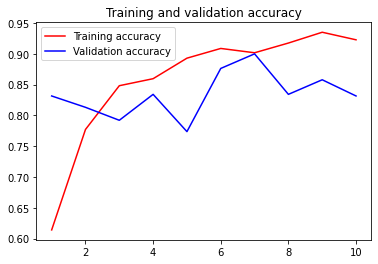

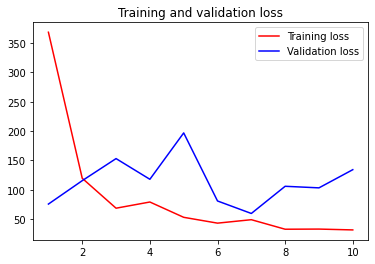

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["categorical_accuracy"]
val_accuracy = history.history["val_categorical_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "r", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "r", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
test_model = keras.models.load_model(
 "ResNet50_5schilders.h5")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

12/12 [==============================] - 45s 4s/step - loss: 62.8688 - categorical_accuracy: 0.8974
Test accuracy: 0.897


In [3]:
conv_base = keras.applications.ResNet101(
 weights="imagenet",
 include_top=False)
conv_base.trainable = False

171458560/171446536 [==============================] - 2s 0us/step


In [6]:
inputs = keras.Input(shape=(500, 500, 3))
x = data_augmentation(inputs)
x = keras.applications.resnet.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(500)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(len(class_names), activation="softmax")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="categorical_crossentropy",
optimizer="RMSprop",
metrics=["categorical_accuracy"])

In [ ]:
callbacks = [
 keras.callbacks.ModelCheckpoint(
filepath="ResNet101_5schilders.h5",
save_best_only=True,
monitor="val_loss")
]
history = model.fit(
 train_dataset,
 epochs=10,
 validation_data=validation_dataset,
 callbacks=callbacks)

Epoch 1/10
36/36 [==============================] - ETA: 0s - loss: 439.4510 - categorical_accuracy: 0.6298

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


36/36 [==============================] - 223s 5s/step - loss: 439.4510 - categorical_accuracy: 0.6298 - val_loss: 221.5595 - val_categorical_accuracy: 0.7368
Epoch 2/10
36/36 [==============================] - 97s 3s/step - loss: 116.1294 - categorical_accuracy: 0.8307 - val_loss: 237.4424 - val_categorical_accuracy: 0.7632
Epoch 3/10
36/36 [==============================] - 120s 3s/step - loss: 70.4889 - categorical_accuracy: 0.8719 - val_loss: 75.4225 - val_categorical_accuracy: 0.8868
Epoch 4/10
36/36 [==============================] - 96s 3s/step - loss: 76.5170 - categorical_accuracy: 0.8789 - val_loss: 225.2092 - val_categorical_accuracy: 0.7868
Epoch 5/10
36/36 [==============================] - 123s 3s/step - loss: 66.6911 - categorical_accuracy: 0.9053 - val_loss: 51.5846 - val_categorical_accuracy: 0.9184
Epoch 6/10
36/36 [==============================] - 96s 3s/step - loss: 52.0488 - categorical_accuracy: 0.9342 - val_loss: 69.8057 - val_categorical_accuracy: 0.9289
Epoch 7

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["categorical_accuracy"]
val_accuracy = history.history["val_categorical_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "r", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "r", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
test_model = keras.models.load_model(
 "ResNet101_5schilders.h5")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")